In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

drivers_path = "./csv_files/drivers.csv"
lap_times_path = "./csv_files/lap_times.csv"
results_path = "./csv_files/results.csv"
constructor_standings_path = "./csv_files/constructor_standings.csv"
constructors_path = "./csv_files/constructors.csv"
driver_standings_path = "./csv_files/driver_standings.csv"

drivers_df = pd.read_csv(drivers_path)
lap_times_df = pd.read_csv(lap_times_path)
results_df = pd.read_csv(results_path)
constructors_standings_df = pd.read_csv(constructor_standings_path)
constructors_df = pd.read_csv(constructors_path)
driver_standings_df = pd.read_csv(driver_standings_path)

In [2]:
# -----------------------------------------------------------------------------------------------------------------------------------------

In [61]:
driver_lap_times_merged_df = pd.merge(lap_times_df, drivers_df)
average_lap_times_df = driver_lap_times_merged_df[['driverId', 'forename', 'surname', 'milliseconds']]

formula_average = average_lap_times_df.groupby("driverId").agg({
    "milliseconds": "mean",
    "forename": "first",
    "surname": "last"
    }).reset_index()

def ms_to_time(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{int(minutes)}:{int(seconds):02}:{int(milliseconds):03}"

formula_average['time'] = formula_average['milliseconds'].apply(ms_to_time)
formula_average['seconds'] = formula_average['milliseconds'] / 1000
formula_average['Full Name'] = formula_average['forename'].fillna('') + ' ' + formula_average['surname'].fillna('')
formula_average_decending = formula_average.sort_values(by='seconds', ascending=False)
formula_average_decending

,driverId,milliseconds,forename,surname,time,seconds,Full Name
27,28,235988.692308,Markus,Winkelhock,3:55:988,235.988692,Markus Winkelhock
107,827,129985.000000,André,Lotterer,2:09:985,129.985000,André Lotterer
33,34,114121.786207,Yuji,Ide,1:54:121,114.121786,Yuji Ide
96,816,110940.722915,Jérôme,d'Ambrosio,1:50:940,110.940723,Jérôme d'Ambrosio
90,810,108922.468668,Lucas,di Grassi,1:48:922,108.922469,Lucas di Grassi
...,...,...,...,...,...,...,...
30,31,86976.960138,Juan,Pablo Montoya,1:26:976,86.976960,Juan Pablo Montoya
42,43,86875.075472,Cristiano,da Matta,1:26:875,86.875075,Cristiano da Matta
71,72,82907.903226,Stéphane,Sarrazin,1:22:907,82.907903,Stéphane Sarrazin
130,850,80792.571429,Pietro,Fittipaldi,1:20:792,80.792571,Pietro Fittipaldi


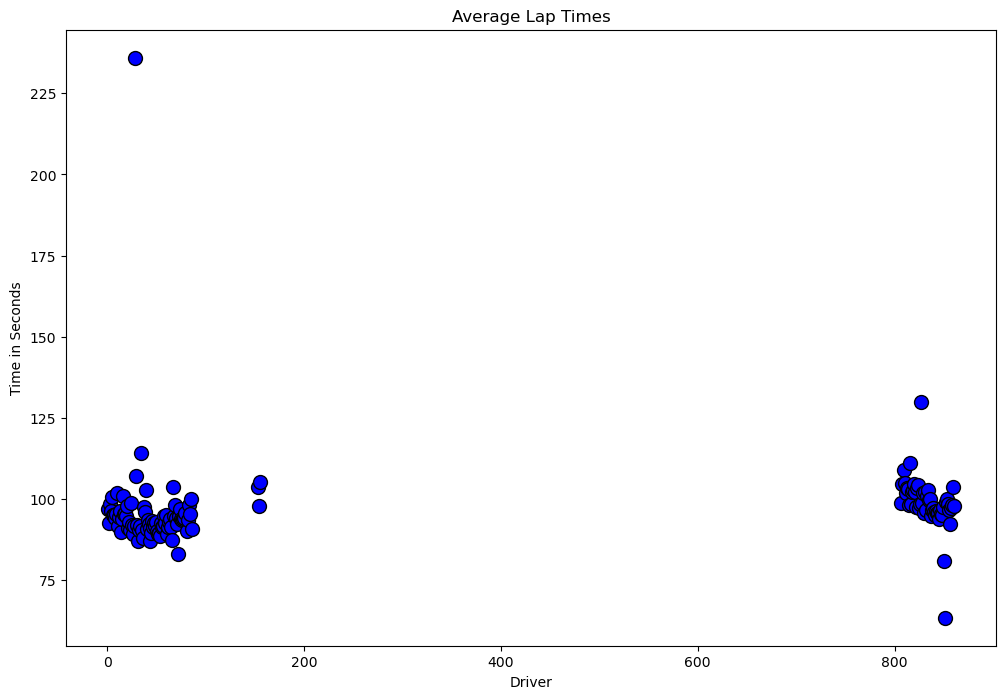

In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(formula_average['driverId'], formula_average['seconds'], color='blue', s=100, edgecolor='black')
plt.xlabel('Driver')
plt.ylabel('Time in Seconds')
plt.title('Average Lap Times')
plt.show()

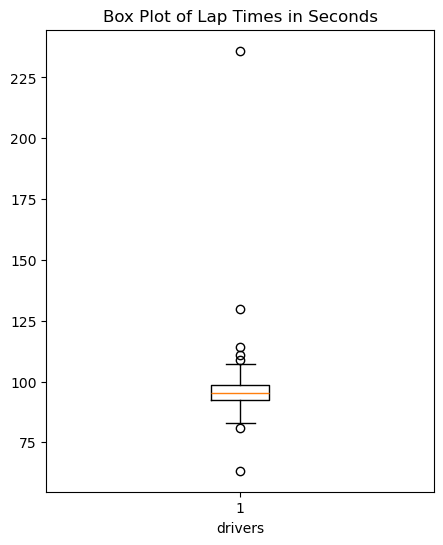

In [7]:
plt.figure(figsize=(5, 6))
plt.boxplot(x=formula_average['seconds'])
plt.title('Box Plot of Lap Times in Seconds')
plt.xlabel('drivers')
plt.show()

In [47]:
Q1 = formula_average['seconds'].quantile(0.25)
Q3 = formula_average['seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = formula_average[(formula_average['seconds'] >= lower_bound) & (formula_average['seconds'] <= upper_bound)]
lap_time_ascending = filtered_df.sort_values(by='seconds', ascending=True)
lap_time_ascending_reduced = lap_time_ascending[['Full Name', 'time']]
lap_time_ascending_reduced

,Full Name,time
71,Stéphane Sarrazin,1:22:907
42,Cristiano da Matta,1:26:875
30,Juan Pablo Montoya,1:26:976
65,Allan McNish,1:27:315
35,Franck Montagny,1:27:851
...,...,...
89,Vitaly Petrov,1:44:544
100,Max Chilton,1:44:689
91,Bruno Senna,1:44:977
87,Kamui Kobayashi,1:45:235


In [11]:
# -----------------------------------------------------------------------------------------------------------------------------------------

In [13]:
driver_results_merged_df = pd.merge(drivers_df, results_df)
placment_location_df = driver_results_merged_df[['driverId', 'nationality', 'positionOrder']]
df_filtered = placment_location_df[placment_location_df['positionOrder'] > 0]
country_avg_position = df_filtered.groupby('nationality')['positionOrder'].mean().reset_index()
best_country = country_avg_position.sort_values(by='positionOrder').reset_index(drop=True)

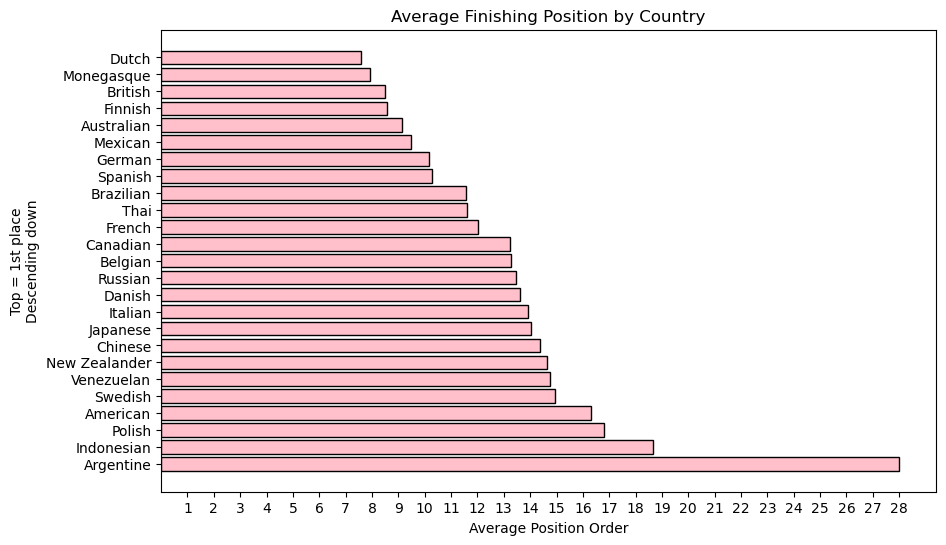

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(best_country['nationality'], best_country['positionOrder'], color='pink', edgecolor='black')
plt.xlabel('Average Position Order')
plt.ylabel('Top = 1st place\nDescending down')
plt.title('Average Finishing Position by Country')
plt.xticks(range(1, int(best_country['positionOrder'].max()) + 1), 
           labels=[f"{i}" for i in range(1, int(best_country['positionOrder'].max()) + 1)],
          )
plt.gca().invert_yaxis() 
plt.show()

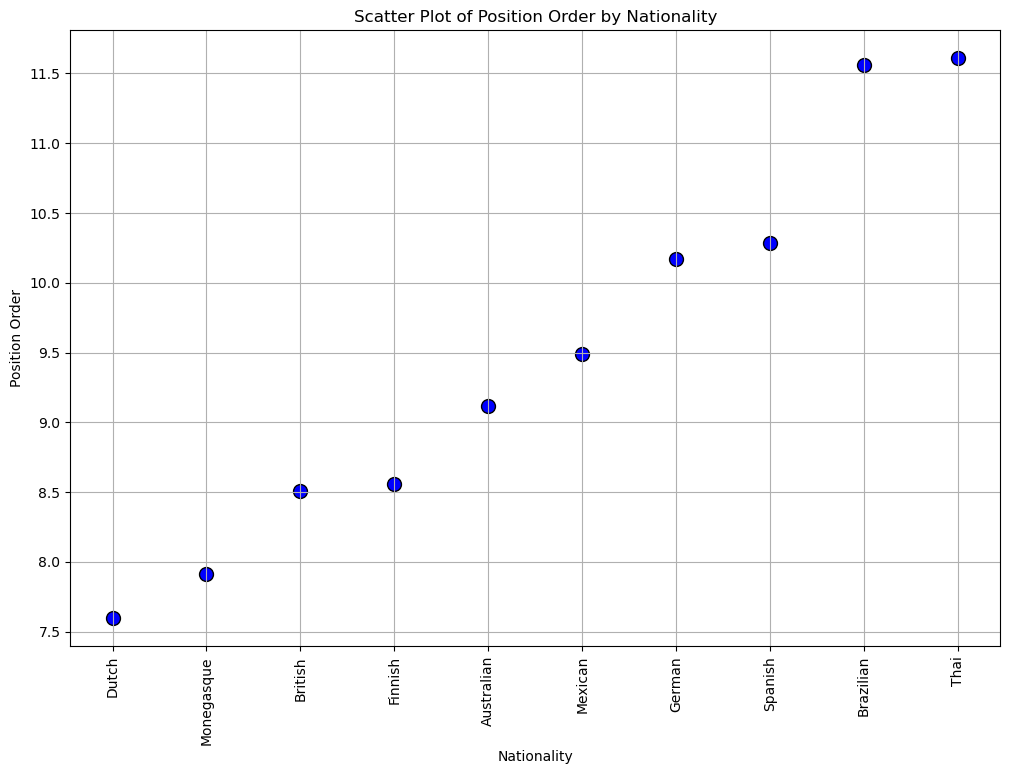

In [43]:
best_country_reformatted = {
    'nationality': ['Dutch', 'Monegasque', 'British', 'Finnish', 'Australian', 'Mexican', 'German', 
                    'Spanish', 'Brazilian', 'Thai', 'French', 'Canadian', 'Belgian', 'Russian', 
                    'Danish', 'Italian', 'Japanese', 'Chinese', 'New Zealander', 'Venezuelan', 
                    'Swedish', 'American', 'Polish', 'Indonesian', 'Argentine'],
    'positionOrder': [7.596026, 7.911765, 8.510851, 8.558974, 9.120172, 9.490119, 10.167665, 
                      10.282723, 11.558333, 11.608696, 12.016632, 13.240741, 13.268293, 13.470968, 
                      13.605714, 13.918033, 14.042105, 14.363636, 14.620690, 14.736842, 14.958763, 
                      16.324324, 16.782609, 18.666667, 28.000000]
}

best_country_scatter = pd.DataFrame(best_country_reformatted)
best_country_scatter_reduced = best_country_scatter.nsmallest(10, 'positionOrder')
plt.figure(figsize=(12, 8))
plt.scatter(best_country_scatter_reduced['nationality'], best_country_scatter_reduced['positionOrder'], color='blue', s=100, edgecolor='black')
plt.xlabel('Nationality')
plt.ylabel('Position Order')
plt.title('Scatter Plot of Position Order by Nationality')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


In [27]:
# -----------------------------------------------------------------------------------------------------------------------------------------

In [63]:
constructors_merged_df = pd.merge(constructors_df, constructors_standings_df)
constructor_wins = constructors_merged_df.groupby(['constructorId','constructorRef'])['wins'].sum().reset_index()
constructor_sorted_df = constructor_wins.sort_values(by='wins', ascending=False)
constructor_filtered_df = constructor_sorted_df[constructor_sorted_df['wins'] > 0]
constructor_filtered_df_reset = constructor_filtered_df.reset_index(drop=True)
constructor_filtered_df_reset

,constructorId,constructorRef,wins
0,6,ferrari,1944
1,1,mclaren,1610
2,131,mercedes,1208
3,9,red_bull,1189
4,3,williams,934
5,32,team_lotus,374
6,4,renault,352
7,22,benetton,220
8,34,brabham,179
9,25,tyrrell,166


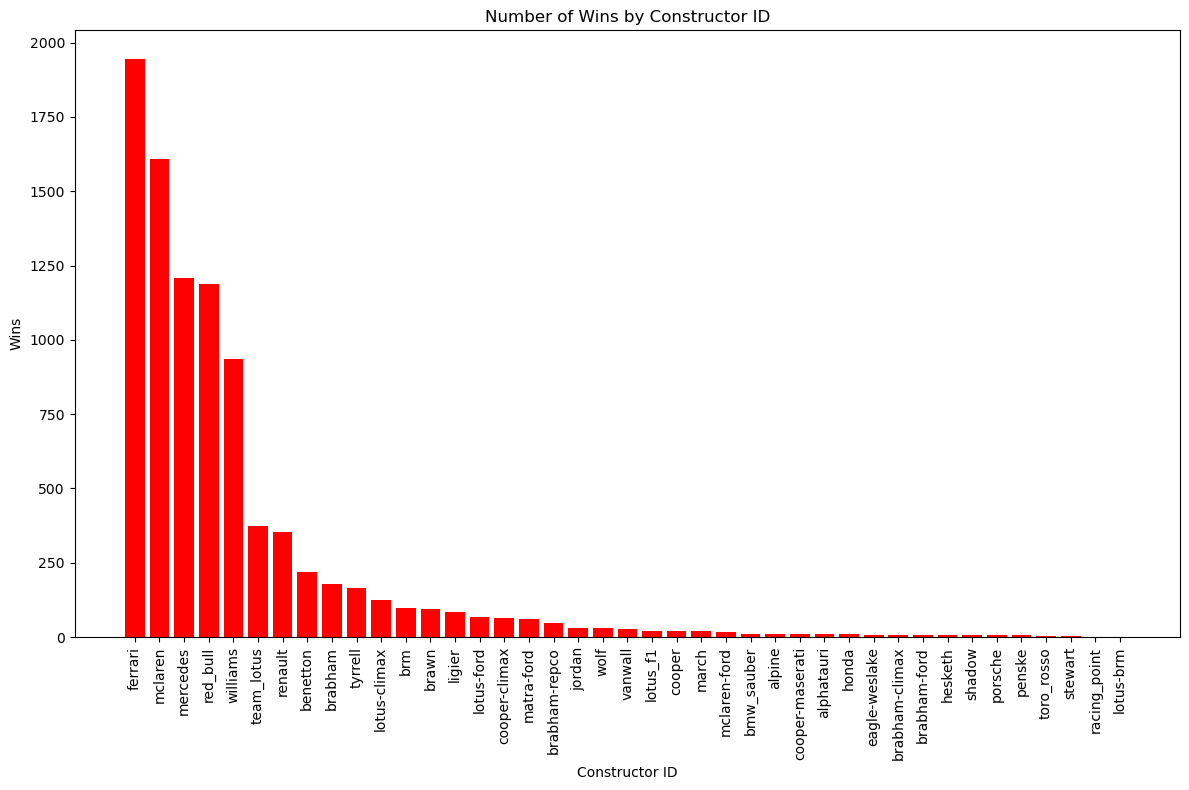

In [31]:

plt.figure(figsize=(12, 8)) 
plt.bar(constructor_filtered_df_reset['constructorRef'].astype(str), constructor_filtered_df_reset['wins'], color='red')
plt.xlabel('Constructor ID')
plt.ylabel('Wins')  
plt.title('Number of Wins by Constructor ID') 
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

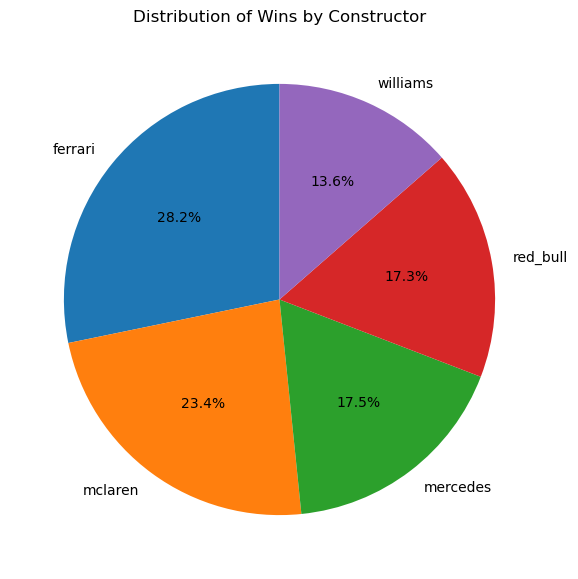

In [33]:
constructor_filtered_df_reset
top_5_constructor_Id = constructor_filtered_df_reset.nlargest(5, 'wins')
plt.figure(figsize=(10, 7))
plt.pie(top_5_constructor_Id['wins'], labels=top_5_constructor_Id['constructorRef'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Wins by Constructor')
plt.show()

In [35]:
# -----------------------------------------------------------------------------------------------------------------------------------------

In [37]:
driver_standing_df = pd.merge(drivers_df, driver_standings_df)
driver_info_df = driver_standing_df[['driverId', 'driverRef', 'position']]
driver_info_filtered_df = driver_info_df[driver_info_df['position'] > 0]
driver_average_position = driver_info_filtered_df.groupby(['driverId', 'driverRef'])['position'].mean().reset_index()
driver_average_position['position'] = driver_average_position['position'].round(0)
top_20_drivers_df = driver_average_position.nsmallest(20, 'position')

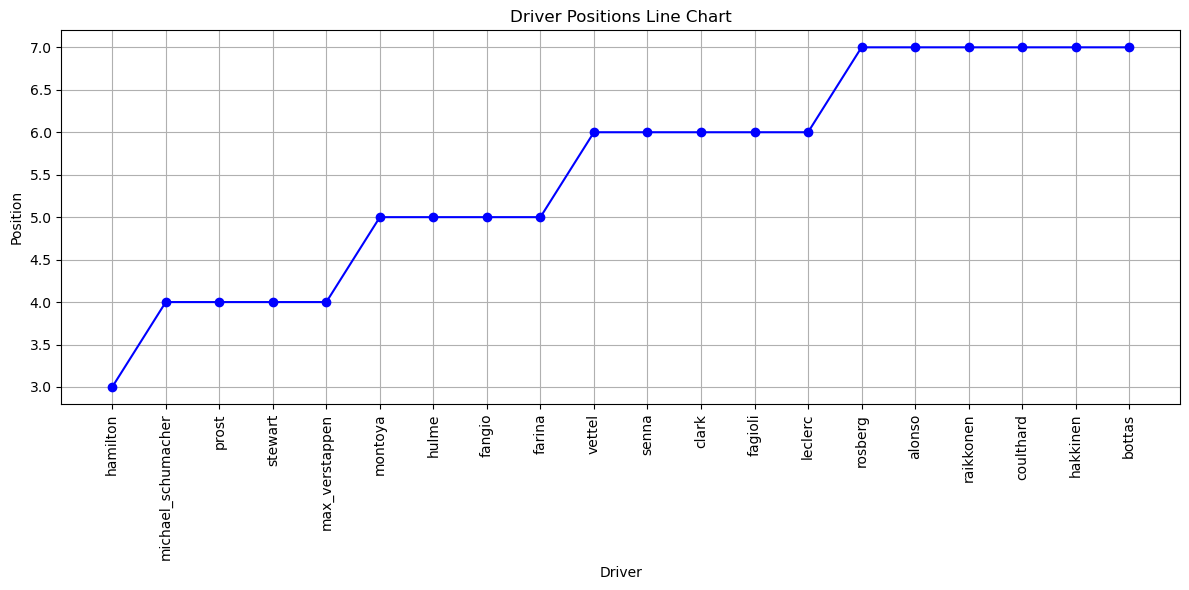

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(top_20_drivers_df['driverRef'], top_20_drivers_df['position'], marker='o', linestyle='-', color='b')
plt.xlabel('Driver')
plt.ylabel('Position')
plt.title('Driver Positions Line Chart')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
driver_wins_df = driver_standing_df[['driverId', 'driverRef', 'wins']]
driver_wins_filtered_df = driver_wins_df.groupby(['driverId', 'driverRef'])['wins'].sum().reset_index()
driver_wins_filtered_df = driver_wins_filtered_df.sort_values(by='wins', ascending=False)
top_5_drivers_overall = driver_wins_filtered_df.nlargest(5, 'wins')

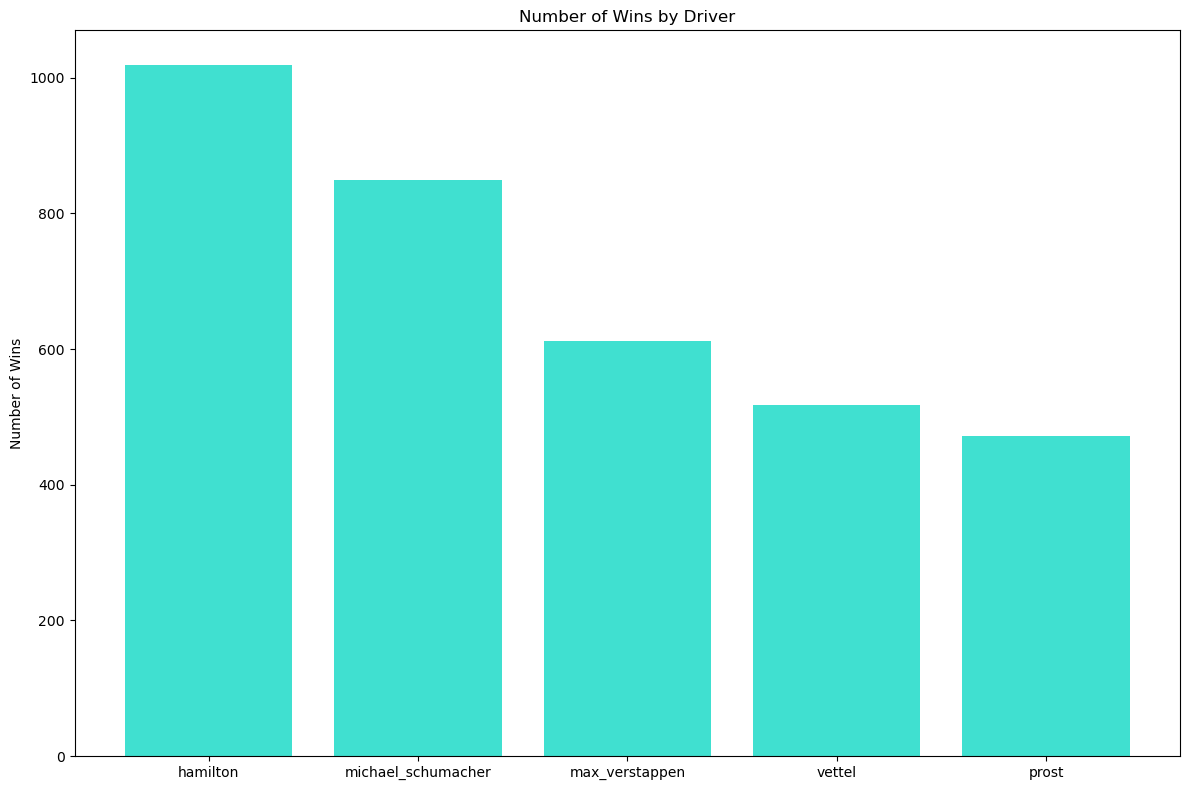

In [49]:
plt.figure(figsize=(12, 8)) 
plt.bar(top_5_drivers_overall['driverRef'].astype(str), top_5_drivers_overall['wins'], color='turquoise')
# plt.xlabel('Driver')
plt.ylabel('Number of Wins')  
plt.title('Number of Wins by Driver') 
plt.tight_layout() 
plt.show()